# CHAPTER 10 - LINEAR REGRESSION

## Vanessa Jean-Poix

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = sns.load_dataset('diamonds')

In [2]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)

- The r-value measures the strength and direction of the linear relationship between two variables.
- The possible range of values for r is -1 to 1.
- An r-value of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable increases as well.
- An r-value of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases.
- An r-value of 0 indicates no linear relationship between the two variables.

In [4]:
corr_matrix = data.corr()
corr_matrix.head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


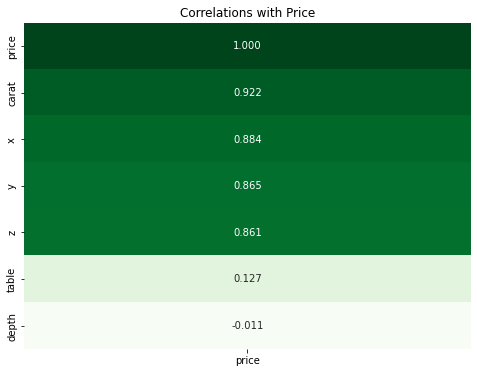

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False).head(10), annot=True, fmt='.3f', cmap='Greens', cbar=False)
plt.title('Correlations with Price')
plt.show()

## Procedure for Creating and Using a Regression Model

1. Prepare the data by selecting the appropriate features and cleaning the dataset.
2. Split the data into training and testing datasets.
3. Instantiate a regression model object.
4. Fit the model to the training dataset and evaluate its performance on the testing dataset.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
X = data[['carat']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [8]:
model = LinearRegression()
print(model)

LinearRegression()


In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
model_score = model.score(X_test, y_test)
print("Model Score:", model_score)

Model Score: 0.8504107786474794


In [11]:
y_pred = model.predict(X_test)
print(y_pred)

[9540.64191438 1940.07543252 3180.98424589 ... 9618.19871522 -464.18539337
 5507.68827094]


In [12]:
predicted_df = pd.DataFrame(y_pred, columns=['predicted_price'])
predicted_df.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [13]:
joined_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), predicted_df], axis=1)
joined_df.head()

,carat,price,predicted_price
0,1.52,8674,9540.641914
1,0.54,1637,1940.075433
2,0.70,2657,3180.984246
3,0.59,1838,2327.859437
4,0.86,2980,4421.893059


In [14]:
melted_df = joined_df.melt(id_vars='carat', value_vars=['price', 'predicted_price'], var_name='type', value_name='value')
melted_df.head()

,carat,type,value
0,1.52,price,8674.0
1,0.54,price,1637.0
2,0.70,price,2657.0
3,0.59,price,1838.0
4,0.86,price,2980.0


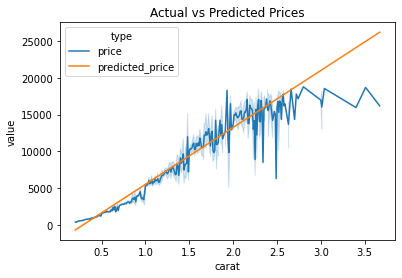

In [15]:
sns.lineplot(x='carat', y='value', hue='type', data=melted_df)
plt.title('Actual vs Predicted Prices')
plt.show()

## Equation of a line, y=mx+b
- b is the **Y-intercept**

In [16]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [17]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [18]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800454293


In [19]:
print(f"The equation of the regression line is: price = {m[0]:.2f} * carat + {b:.2f}")

The equation of the regression line is: price = 7756.43 * carat + -2256.36


In [23]:
new_carat = 0.70
new_price = lr.predict([[new_carat]])[0]
print(f"The predicted price for a 0.70 carat diamond is estimated to cost ${new_price:.2f}")

The predicted price for a 0.70 carat diamond is estimated to cost $3173.14


In [24]:
new_carat = 0.54
new_price = lr.predict([[new_carat]])[0]
print(f"The predicted price for a 0.54 carat diamond is estimated to cost ${new_price:.2f}")

The predicted price for a 0.54 carat diamond is estimated to cost $1932.11


## The estimates are not close to the predicted prices in the results of Step 18.
- For the 0.54 carat diamond the price in Step 18 is 1637. The price difference is is 295.11
- For the 0.70 carat diamond the price in Step 18 is 2657. The price difference is 516.14